# <span style="color:#FF0000">Caso de Estudio: Predicción de Éxito en Campañas de Telemercadeo con Deep Learning
</span>

**Autor:** Luis E. Seijas

**Curso:** Deep Learning para Negocios

---
 **Desarrollado por:**

Juan Camilo Sanmiguel 
Jonathan Alejandro Rubiano

### 1. Descripción del Problema

En este proyecto, actuarás como Científico de Datos para una institución financiera. El banco necesita optimizar sus campañas de **telemercadeo** para ofrecer depósitos a plazo, un producto financiero clave. Cada llamada tiene un costo, y llamar a clientes que no están interesados no solo es ineficiente, sino que también puede generar una mala experiencia para el cliente.

**El objetivo principal es:**

> Construir un modelo de clasificación basado en redes neuronales profundas que pueda predecir con alta precisión si un cliente suscribirá (`'sí'`) o no (`'no'`) un depósito a plazo después de ser contactado.

Un modelo exitoso permitirá al banco:
*  **Focalizar los esfuerzos:** Concentrar las llamadas en los clientes con mayor probabilidad de conversión.
*  **Reducir costos:** Minimizar el número de llamadas innecesarias.
*  **Aumentar la tasa de éxito:** Mejorar el retorno de inversión (ROI) de las campañas de marketing.

**Es importante considerar:** Los datos son una mezcla de información demográfica, historial bancario y métricas de la campaña. Tu tarea es procesar estos datos, diseñar una arquitectura de red neuronal efectiva y, finalmente, traducir tus resultados en recomendaciones de negocio accionables.

## 2. Análisis Exploratorio de Datos (EDA)</span>


### Análisis de la Columna *poutcome*
Durante el análisis exploratorio, se identificó que la columna **`poutcome`** contiene una gran cantidad de información relevante para los modelos predictivos. Sin embargo, esta columna presentaba un número significativo de valores faltantes. Para abordar este problema, se emplearon técnicas de *machine learning* para imputar los datos en blanco. Se compararon dos modelos:

- *K-Nearest Neighbors* (*KNN*)
- *Random Forest*

Tras evaluar el desempeño de ambos modelos, se seleccionó *KNN* debido a su mayor valor de *accuracy*, lo que garantizó una imputación más precisa de los datos faltantes pero al ejecutar los modelos se encontro que este ajuste generaba un sobre ajuste del modelo y se decidio por una opción que agrege un menor sesgo como lo fue cambiar todos los datos en blanco por una nueva categoria llamada "Desconocido".

### Selección de Características
Con el objetivo de optimizar el entrenamiento de los modelos y reducir el costo computacional, se implementó un análisis de selección de características. Este proceso permitió identificar las variables con mayor relevancia predictiva. Se compararon tres técnicas ampliamente utilizadas:

- **Mutual Information**: Mide la dependencia mutua entre las variables y el objetivo, destacando aquellas con mayor información compartida.
- **Random Forest**: Evalúa la importancia de las características basándose en la contribución de cada variable al modelo.
- **Lasso**: Utiliza regularización para seleccionar características, penalizando aquellas con menor impacto predictivo.

### Resultados y Beneficios
El análisis de selección de características permitió identificar las columnas con mayor aporte de información, optimizando así el proceso de entrenamiento. Este enfoque no solo mejora el desempeño de los modelos, sino que también reduce significativamente el tiempo de entrenamiento y el costo computacional, especialmente en conjuntos de datos complejos. Al emplear estas estrategias, se logra un equilibrio entre precisión y eficiencia, asegurando resultados robustos sin comprometer el rendimiento.

# <span style="color:#005566; font-size:0.5em">1. Resultados del machine learning aplicado a la columna poutcome</span>

RandomForest -> Accuracy promedio: 0.5319

KNN -> Accuracy promedio: 0.5939

Modelo elegido: KNN



# <span style="color:#005566; font-size:0.5em">2. Resultados de la Selección de Características</span>

### Resultados del Modelo *Random Forest*

El modelo *Random Forest* asigna un puntaje de importancia a cada variable basado en su contribución a la predicción. A continuación, se muestra la tabla con las variables ordenadas por su importancia:

| Variable       | Importance |
|----------------|------------|
| duration       | 0.278299   |
| balance        | 0.111400   |
| age            | 0.106359   |
| day_of_week    | 0.090404   |
| month          | 0.090199   |
| poutcome       | 0.072857   |
| pdays          | 0.050138   |
| job            | 0.048613   |
| campaign       | 0.037332   |
| previous       | 0.025592   |
| education      | 0.024016   |
| marital        | 0.022691   |
| housing        | 0.022384   |
| loan           | 0.009704   |
| contact        | 0.008256   |
| default        | 0.001753   |

**Observación**: La variable *duration* destaca como la más relevante, seguida de *balance* y *age*, lo que indica que estas variables tienen un impacto significativo en el modelo.

### Resultados del Modelo *Mutual Information*
La técnica de *Mutual Information* mide la dependencia mutua entre cada variable y la variable objetivo. Los resultados se presentan en la siguiente tabla, ordenados por el puntaje de *Mutual Information* (*MI_Score*):

| Variable       | MI_Score   |
|----------------|------------|
| duration       | 0.080692   |
| poutcome       | 0.031693   |
| month          | 0.030554   |
| pdays          | 0.025465   |
| balance        | 0.023802   |
| age            | 0.014410   |
| job            | 0.009232   |
| previous       | 0.008995   |
| housing        | 0.008499   |
| day_of_week    | 0.008289   |
| campaign       | 0.005177   |
| loan           | 0.003625   |
| marital        | 0.002191   |
| education      | 0.001455   |
| default        | 0.000601   |
| contact        | 0.000026   |

**Observación**: Similar a *Random Forest*, la variable *duration* obtuvo el mayor puntaje, seguida de *poutcome* y *month*, lo que refuerza su relevancia en el análisis.

### Resultados del Modelo *Lasso*
La técnica de regularización *Lasso* selecciona variables al asignar coeficientes no nulos a las más relevantes. Las variables seleccionadas por *Lasso* son:

- age
- job
- marital
- education
- default
- balance
- housing
- loan
- contact
- day_of_week
- month
- duration
- campaign
- pdays
- previous
- poutcome

**Observación**: *Lasso* seleccionó todas las variables disponibles, lo que sugiere que todas aportan información relevante al modelo, aunque con diferente peso.

### Conclusiones
Los resultados de las tres técnicas de selección de características (*Random Forest*, *Mutual Information* y *Lasso*) muestran que *duration*, *poutcome*, *month* y *balance* son consistentemente las variables más relevantes para el modelo predictivo. Pero a su vez al mostrar pesos diferentes en cada variable no da una total claridad por lo cual se van a tomar todas las variables, como lo refuerza el resultado de Lasso.  

### 3. Diseño y Entrenamiento del Modelo de Deep Learning

Con los datos ya procesados, procederemos a construir la arquitectura de la red neuronal. El diseño de la arquitectura es un paso fundamental que implica definir el número de capas, la cantidad de neuronas en cada capa, las funciones de activación y las técnicas para prevenir el sobreajuste.

Posteriormente, compilaremos el modelo especificando el optimizador y la función de pérdida, y lo entrenaremos con nuestros datos. Esta sección responderá a las **Preguntas 4 y 5**.

#### **Tarea: Definir la Arquitectura de su Modelo**

Utilizando la función `build_classifier` definida más abajo, su tarea es experimentar y definir la arquitectura de la red neuronal. Modifique los valores en la siguiente celda de código para explorar cómo los cambios afectan el rendimiento del modelo.

**Parámetros a experimentar:**
* `HIDDEN_LAYERS`: Pruebe con más o menos capas, y con diferente número de neuronas (e.g., `(128, 64, 32)`, `(32,)`, `(100, 50)`).
* `DROPOUT_RATE`: Varíe la tasa de dropout (e.g., `0.2`, `0.5`) o desactívelo (`0.0`).
* `LEARNING_RATE`: Pruebe con tasas de aprendizaje más altas o más bajas (e.g., `0.01`, `0.0001`).

Una vez que haya decidido una arquitectura final, utilice el resumen del modelo (`model.summary()`) y la justificación de la celda siguiente para responder a la **Pregunta 4**.

¿Por qué usamos Binary Focal Loss (y no class_weight)?
Situación del problema

Tenemos desbalance: muchos “No” y pocos “Sí”.

Con pérdida estándar (binary cross-entropy), el modelo aprende rápido a acertar los “No” y “se olvida” de los “Sí”.

¿Qué hace Focal Loss?

Es una variante de la pérdida que le presta más atención a los ejemplos difíciles.

Idea simple: si el modelo ya acierta un ejemplo, lo “premia” menos; si se equivoca o duda, lo “castiga” más.

Dos perillas:

γ (gamma): cuánta fuerza ponemos en los casos difíciles (usamos γ=2.0).

α (alpha): cuánto peso extra damos a la clase positiva “Sí” por ser minoritaria (usamos α=0.75).

Basicamente a nivel de negocio el entreenamiento gracias a esto se enfoca en detectar mejor los "Si", que son los que generan conversion para nuestro caso . Se definio de la siguiente manera :

In [ ]:
#Definimos el focal loss 

# ==== Focal Loss personalizada ====
import tensorflow as tf

def binary_focal_loss(gamma=2.0, alpha=0.75):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        eps = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, eps, 1. - eps)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        w = tf.where(tf.equal(y_true, 1), alpha, 1 - alpha)
        return -tf.reduce_mean(w * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss



Entonces. ¿Por qué no class_weight?

class_weight solo sube el peso global de la clase minoritaria, pero no distingue entre ejemplos fáciles y difíciles.

En la práctica:

Con class_weight el modelo mejora algo el balance, pero sigue priorizando los “No” fáciles.

Con Focal Loss el modelo insiste en aprender los “Sí” que le cuestan, que son justo los que nos interesan.  A nivel de resultados lo que esperamos es que nos de menos sobreajuste mejorando las curvas de eprdida y AUC de train/validation, Mejor sensibilidad a "SI", nuestr PR-AUC igual o ligeramente mejor

A nivel de negocio, para el banco esto se traduce en mas clientes captados y mejor uso del presupuesto de llamada.

In [22]:
# ==== Panel de Control (Focal Loss) ====
HIDDEN_LAYERS   = (128, 64)   # arquitectura moderada
DROPOUT_RATE    = 0.25
LEARNING_RATE   = 1e-3
L2_LAMBDA       = 1e-4
ALPHA_LEAKY     = 0.10
BATCH_SIZE      = 64
MAX_EPOCHS      = 100
VAL_SPLIT       = 0.20

# Parámetros Focal Loss
GAMMA_FL        = 2.0    # enfoca en casos mal clasificados
ALPHA_FL        = 0.75   # pondera más la clase positiva (minoritaria)


In [23]:
# ==== Modelo con Focal Loss ====
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def build_classifier_focal(n_features,
                           hidden_layers=HIDDEN_LAYERS,
                           dropout_rate=DROPOUT_RATE,
                           learning_rate=LEARNING_RATE,
                           l2_lambda=L2_LAMBDA,
                           alpha_leaky=ALPHA_LEAKY,
                           gamma=GAMMA_FL,
                           alpha=ALPHA_FL):
    model = Sequential(name="Bank_Marketing_FocalLoss")

    # Capa 1
    model.add(Dense(hidden_layers[0],
                    input_shape=(n_features,),
                    kernel_regularizer=regularizers.l2(l2_lambda),
                    name="Capa_Oculta_1_neuronas"))
    model.add(BatchNormalization(name="BN_1"))
    model.add(LeakyReLU(alpha=alpha_leaky, name="LeakyReLU_1"))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate, name="Dropout_1"))

    # Capas ocultas restantes
    for i, units in enumerate(hidden_layers[1:], start=2):
        model.add(Dense(units,
                        kernel_regularizer=regularizers.l2(l2_lambda),
                        name=f"Capa_Oculta_{i}_neuronas"))
        model.add(BatchNormalization(name=f"BN_{i}"))
        model.add(LeakyReLU(alpha=alpha_leaky, name=f"LeakyReLU_{i}"))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate, name=f"Dropout_{i}"))

    # Capa de salida
    model.add(Dense(1, activation='sigmoid', name="Capa_Salida_Sigmoide"))

    # Compilación con Focal Loss
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=binary_focal_loss(gamma=gamma, alpha=alpha),
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(curve='ROC', name='auc'),
            tf.keras.metrics.AUC(curve='PR', name='pr_auc')
        ]
    )
    return model


In [24]:
n_features = X_train_processed.shape[1]
model = build_classifier_focal(n_features)

model.summary()

c:\Users\alejo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\alejo\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "Bank_Marketing_FocalLoss"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1_neuronas (Dense)  │ (None, 128)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_1 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LeakyReLU_1 (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2_neuronas (Dense)  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_2 (BatchNormalization)       │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LeakyReLU_2 (LeakyReLU)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida_Sigmoide (Dense)    │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [25]:
# ==== Entrenamiento con EarlyStopping y ReduceLROnPlateau ====
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_pr_auc',
    patience=8,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

lr_plateau = ReduceLROnPlateau(
    monitor='val_pr_auc',
    mode='max',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Construir y entrenar el modelo
n_features = X_train_processed.shape[1]
model = build_classifier_focal(n_features)

history = model.fit(
    X_train_processed, y_train,
    epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=[early_stopping, lr_plateau],
    verbose=1
)


Epoch 1/100
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8239 - auc: 0.8401 - loss: 0.0536 - pr_auc: 0.3997 - val_accuracy: 0.8757 - val_auc: 0.9187 - val_loss: 0.0390 - val_pr_auc: 0.5466 - learning_rate: 0.0010
Epoch 2/100
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8593 - auc: 0.8958 - loss: 0.0410 - pr_auc: 0.5087 - val_accuracy: 0.8732 - val_auc: 0.9181 - val_loss: 0.0368 - val_pr_auc: 0.5434 - learning_rate: 0.0010
Epoch 3/100
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8650 - auc: 0.9063 - loss: 0.0373 - pr_auc: 0.5269 - val_accuracy: 0.8782 - val_auc: 0.9239 - val_loss: 0.0339 - val_pr_auc: 0.5639 - learning_rate: 0.0010
Epoch 4/100
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8697 - auc: 0.9142 - loss: 0.0343 - pr_auc: 0.5461 - val_accuracy: 0.8724 - val_auc: 0.9246 - val_loss: 0.0321 - val_pr_auc: 0.5691 - learning_rate: 0.0010
Epoch 5/100
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8695 - auc: 0.9149 - loss: 0.0326 - pr_au

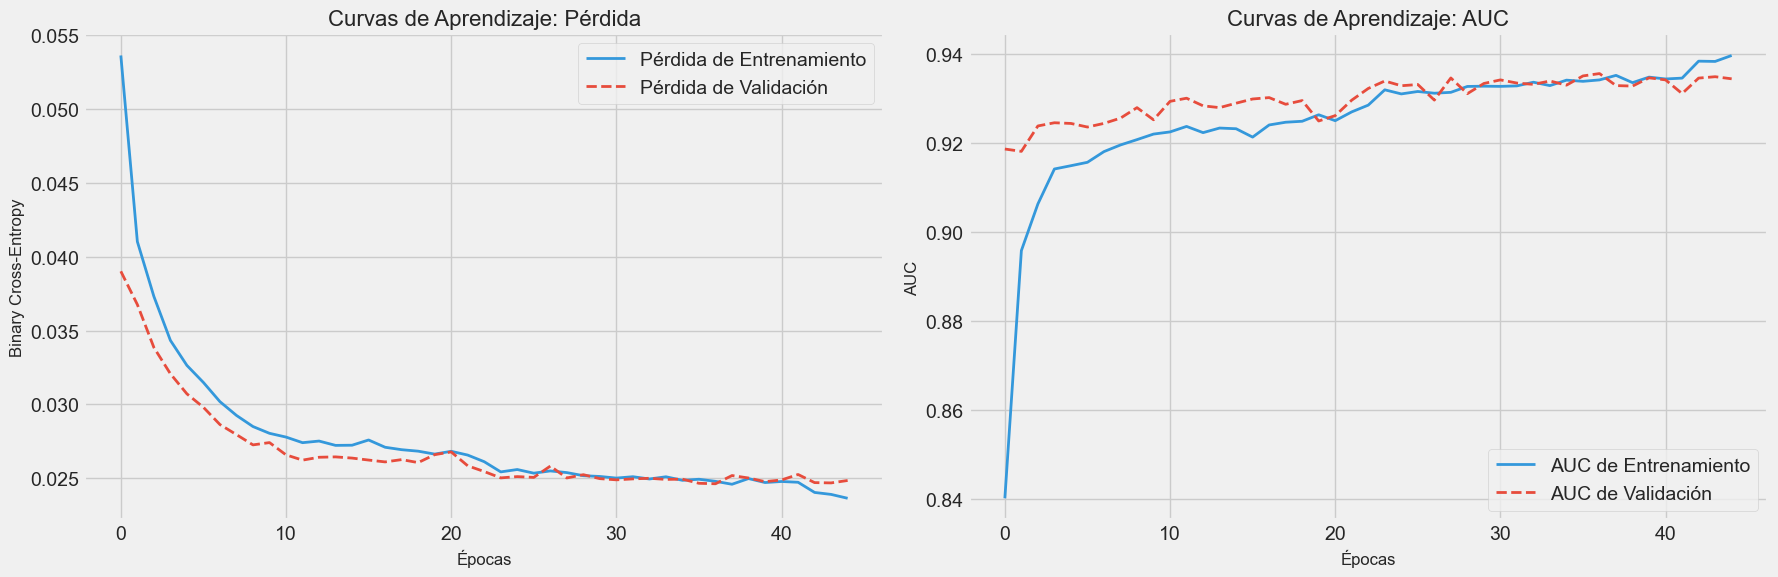

In [26]:
# -*- coding: utf-8 -*-
"""
Visualización del rendimiento durante el entrenamiento.

Graficar las curvas de aprendizaje (pérdida y métricas) para los conjuntos de
entrenamiento y validación es esencial para diagnosticar el sobreajuste y
evaluar el proceso de aprendizaje del modelo.
"""
# El objeto 'history' devuelto por model.fit() contiene un diccionario
# con los valores de pérdida y métricas de cada época.
# Lo convertimos a un DataFrame de pandas para facilitar la manipulación.
history_df = pd.DataFrame(history.history)

# Creamos una figura con dos subplots, uno al lado del otro.
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Gráfico de la Función de Pérdida (Loss) ---
# Compara cómo evolucionó el error en los datos de entrenamiento vs. validación.
axes[0].plot(history_df['loss'], label='Pérdida de Entrenamiento', color='#3498db', lw=2)
axes[0].plot(history_df['val_loss'], label='Pérdida de Validación', color='#e74c3c', lw=2, linestyle='--')
axes[0].set_title('Curvas de Aprendizaje: Pérdida', fontsize=16)
axes[0].set_xlabel('Épocas', fontsize=12)
axes[0].set_ylabel('Binary Cross-Entropy', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# --- Gráfico de la Métrica de Rendimiento (AUC) ---
# Compara el rendimiento (AUC) en los datos de entrenamiento vs. validación.
# Usamos AUC en lugar de Accuracy por ser más robusto al desbalance.
axes[1].plot(history_df['auc'], label='AUC de Entrenamiento', color='#3498db', lw=2)
axes[1].plot(history_df['val_auc'], label='AUC de Validación', color='#e74c3c', lw=2, linestyle='--')
axes[1].set_title('Curvas de Aprendizaje: AUC', fontsize=16)
axes[1].set_xlabel('Épocas', fontsize=12)
axes[1].set_ylabel('AUC', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Ajusta el layout para evitar solapamientos y muestra la figura.
plt.tight_layout()
plt.show()

## 5. Evaluación del Rendimiento del Modelo

Ha llegado el momento de la verdad. Hasta ahora, hemos entrenado el modelo y monitoreado su rendimiento utilizando un conjunto de validación derivado de los datos de entrenamiento. Ahora, evaluaremos su capacidad de generalización final utilizando el **conjunto de prueba (`test set`)**, que el modelo no ha visto en ninguna etapa anterior.

Esta evaluación nos permitirá obtener una estimación imparcial de cómo se comportaría el modelo en un entorno de producción con datos nuevos. Nos centraremos en las métricas de clasificación clave para abordar la **Pregunta 6**.

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
ROC AUC (prob): 0.9290  |  PR-AUC (prob): 0.6031
Umbral óptimo F1: 0.543  |  Umbral óptimo F2: 0.473

--- Reporte @ 0.5 (baseline) (thr=0.500) ---
              precision    recall  f1-score   support

          No      0.972     0.892     0.930      7985
          Sí      0.495     0.803     0.613      1058

    accuracy                          0.881      9043
   macro avg      0.733     0.847     0.771      9043
weighted avg      0.916     0.881     0.893      9043



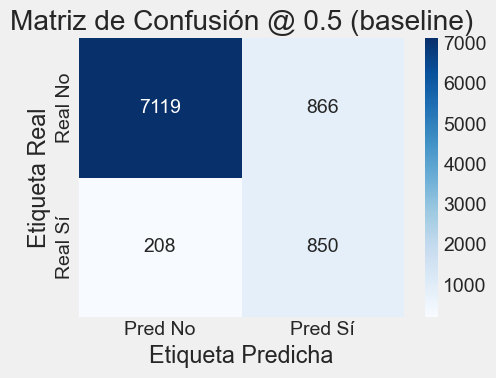


--- Reporte @ F1-óptimo (thr=0.543) ---
              precision    recall  f1-score   support

          No      0.960     0.926     0.943      7985
          Sí      0.561     0.712     0.627      1058

    accuracy                          0.901      9043
   macro avg      0.761     0.819     0.785      9043
weighted avg      0.914     0.901     0.906      9043



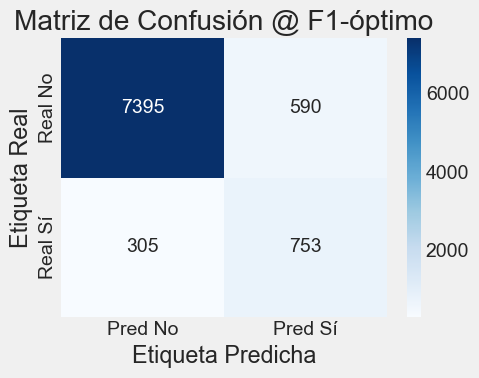

Top-10%  Conv: 0.618  Base: 0.117  Lift: 5.28x
Top-20%  Conv: 0.481  Base: 0.117  Lift: 4.12x
Top-30%  Conv: 0.363  Base: 0.117  Lift: 3.11x


In [27]:

from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4.1 Probabilidades en test (ya las usas más abajo)
y_pred_proba = model.predict(X_test_processed).ravel()

# 4.2 Métricas de ranking (umbral-agnósticas)
roc  = roc_auc_score(y_test, y_pred_proba)
pra  = average_precision_score(y_test, y_pred_proba)  # PR-AUC
print(f"ROC AUC (prob): {roc:.4f}  |  PR-AUC (prob): {pra:.4f}")

# 4.3 Umbral OPTIMO por F1 y por F2 (si priorizas recall)
prec, rec, thr = precision_recall_curve(y_test, y_pred_proba)
f1 = 2*(prec*rec)/(prec+rec+1e-12)
best_thr_f1 = thr[np.argmax(f1)]
beta = 2
f2 = (1+beta**2)*(prec*rec)/(beta**2*prec + rec + 1e-12)
best_thr_f2 = thr[np.argmax(f2)]

print(f"Umbral óptimo F1: {best_thr_f1:.3f}  |  Umbral óptimo F2: {best_thr_f2:.3f}")

# 4.4 Comparar 0.5 vs umbral óptimo (para mostrar impacto real)
def eval_with_threshold(th, name):
    y_bin = (y_pred_proba >= th).astype(int)
    print(f"\n--- Reporte @ {name} (thr={th:.3f}) ---")
    print(classification_report(y_test, y_bin, target_names=['No', 'Sí'], digits=3))
    cm = confusion_matrix(y_test, y_bin)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred No', 'Pred Sí'],
                yticklabels=['Real No', 'Real Sí'])
    plt.title(f"Matriz de Confusión @ {name}")
    plt.xlabel('Etiqueta Predicha'); plt.ylabel('Etiqueta Real')
    plt.tight_layout(); plt.show()

eval_with_threshold(0.5, '0.5 (baseline)')
eval_with_threshold(best_thr_f1, 'F1-óptimo')

# 4.5 Escenarios Top-K (capacidad de llamadas)
for K in (0.10, 0.20, 0.30):  # 10%, 20%, 30%
    cut = np.quantile(y_pred_proba, 1-K)
    y_topk = (y_pred_proba >= cut).astype(int)
    conv_rate = y_test[y_topk==1].mean()  # tasa de “sí” en llamados
    base_rate = y_test.mean()
    lift = (conv_rate / base_rate) if base_rate>0 else np.nan
    print(f"Top-{int(K*100)}%  Conv: {conv_rate:.3f}  Base: {base_rate:.3f}  Lift: {lift:.2f}x")


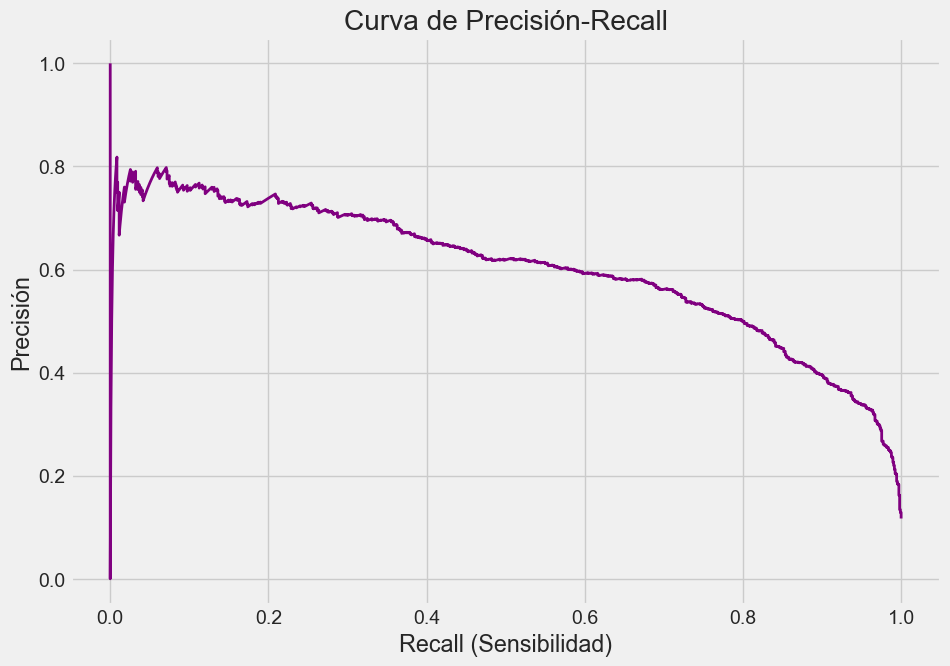

In [28]:
# -*- coding: utf-8 -*-
"""
Paso 5.2: Visualización de la Curva PR.

Esta curva muestra el rendimiento de un modelo de clasificación en todos
los umbrales de clasificación.
"""

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.grid(True)
plt.show()

## Experimento 